### 3. Single Layer Neural Network
- Collection of artificial neurons

In the following example we will be using a Single Layer Neural Network as a Classifier

In [1]:
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt
%matplotlib inline

text = np.loadtxt('data_simple_nn.txt')

# Do Pre-processing:
# For every set in bunch, index [0] & [1] is the data or features
data = text[:, 0:2]

# For every set in bunch, index [2] & [3] is the labels
labels = text[:, 2:]

print("===================== text =====================")
print("text.shape(" + str(text.shape[0]) + " Rows, " + str(text.shape[1]) + " Columns)\n", text)

print("\n===================== data =====================")
print("data.shape(" + str(data.shape[0]) + " Rows, " + str(data.shape[1]) + " Columns)\n", data)

print("\n===================== labels ===================")
print("labels.shape(" + str(labels.shape[0]) + " Rows, " + str(labels.shape[1]) + " Columns)\n", labels)

===================== text =====================
text.shape(16 Rows, 4 Columns)
 [[1.  4.  0.  0. ]
 [1.1 3.9 0.  0. ]
 [1.2 4.1 0.  0. ]
 [0.9 3.7 0.  0. ]
 [7.  4.  0.  1. ]
 [7.2 4.1 0.  1. ]
 [6.9 3.9 0.  1. ]
 [7.1 4.2 0.  1. ]
 [4.  1.  1.  0. ]
 [4.1 0.9 1.  0. ]
 [4.2 1.1 1.  0. ]
 [3.9 0.8 1.  0. ]
 [4.  7.  1.  1. ]
 [4.2 7.2 1.  1. ]
 [3.9 7.1 1.  1. ]
 [4.1 6.8 1.  1. ]]

===================== data =====================
data.shape(16 Rows, 2 Columns)
 [[1.  4. ]
 [1.1 3.9]
 [1.2 4.1]
 [0.9 3.7]
 [7.  4. ]
 [7.2 4.1]
 [6.9 3.9]
 [7.1 4.2]
 [4.  1. ]
 [4.1 0.9]
 [4.2 1.1]
 [3.9 0.8]
 [4.  7. ]
 [4.2 7.2]
 [3.9 7.1]
 [4.1 6.8]]

===================== labels ===================
labels.shape(16 Rows, 2 Columns)
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


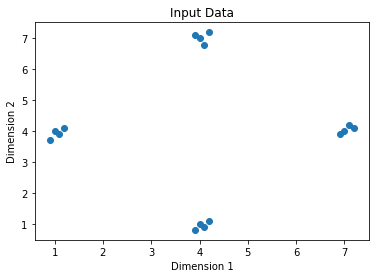

In [2]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('Dimension 1') # X axis = data[:, 0]
plt.ylabel('Dimension 2') # Y axis = data[:, 1]
plt.title('Input Data')

# Get min and max value from index[0] as well as index[1]
dim1_min, dim1_max = data[:, 0].min(), data[:, 0].max()
dim2_min, dim2_max = data[:, 1].min(), data[:, 1].max()

dim1 = [dim1_min, dim1_max] # dim1: [0.9, 7.2]
dim2 = [dim2_min, dim2_max] # dim2: [0.8, 7.2]

# Total number of output neurons = # of Columns in labels (2)
num_output = labels.shape[1]

snn = Single Neural Network
nl.net.newp(minmax,cn,transf) = New Perceptron
- **minmax**: lol, the outer list is the # of input neurons, inner lists must
contain 2 elements: min and max
- **cn** : int, # of output neurons
- **transf** : func (default function is HardLimit)

In summary:
- minmax : **Range of Input Value**
- cn : **# of Neurons**
- transf : Activation Function

### Activation Functions:

- #### Hard limit function
$ \varphi^{\mbox{hlim}}(v)  = \begin{cases}
1 & \mbox{for } v \geq 0 \\
0 & \mbox{for } v < 0
\end{cases}
$


- #### Piecewise linear function
$ \varphi^{\mbox{pwl}}(v) = \begin{cases}
 1 & \mbox{for } v \geq \frac{1}{2} \\
 v + \frac{1}{2} & \mbox{for } -\frac{1}{2} < v < \frac{1}{2} \\
 0 & \mbox{for } v \leq -\frac{1}{2}
 \end{cases} $


- #### Sigmoid function
$ \varphi_a^{\mbox{sig}}(v) = \frac{1}{1 + \exp(-av)}. $

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


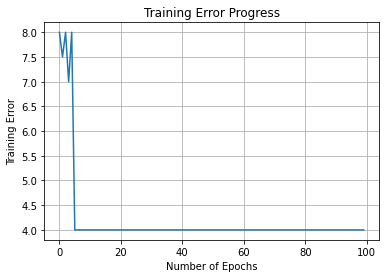

In [3]:
# SingleLayerPerceptron = Create net : Range of input value and output to 2 neurons, with default activation function
snn = nl.net.newp([dim1, dim2], num_output)

# train input patters, train target patterns, number of times data is fed, print, learning rate
error_progress = snn.train(data, labels, epochs=100, show=20, lr=0.03)

plt.plot(error_progress)
plt.xlabel('Number of Epochs')
plt.ylabel('Training Error')
plt.title('Training Error Progress')
plt.grid()

In [4]:
# So now we are going to test our neural network that has not been tested with other data
print('Testing Data:\n')
testing_data = [ [0.3, 4.2],
                 [4.3, 0.5],
                 [4.6, 8  ] ]

# for each data set in testing data,
# print the i data set, then input i dataset into snn.sim, then print out first set in snn.sim
for i in testing_data:
    print(i, '==>', snn.sim([i])[0] )

# Or to simply do : snn.sim(testing_data)

Testing Data:

[0.3, 4.2] ==> [0. 0.]
[4.3, 0.5] ==> [1. 0.]
[4.6, 8] ==> [1. 1.]


### 4.) Multi-layer Neural Network

In the following example we shall be using a Multi-layer Neural Network as Regressor

- $ y = 3{x^2}+5 $

Text(0.5, 1.0, 'Data Points')

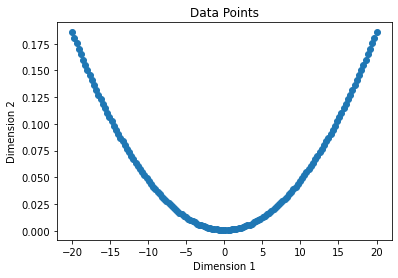

In [5]:
# Generating the data points
min_vals = -20
max_vals = 20
num_points = 140

# Create an array of 140 numbers between -20 and 20
x = np.linspace(min_vals, max_vals, num_points)
y = 3 * np.square(x) + 5

# We are going to have to normalize these points for more efficient computing (this is often done in pre-processing)
y /= np.linalg.norm(y)

data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data Points')


We are going to have 2 Hidden Layers:
- In the 1st Hidden Layer we are going to have 10 Neurons
- In the 2nd Hidden Layer we are going to have 6 Neurons

The Regressor Task is to predict the value which is why we're going to have only one neuron in the output layer


Epoch: 100; Error: 0.18189163149688717;
Epoch: 200; Error: 0.02527356768636248;
Epoch: 300; Error: 0.020287401701950532;
Epoch: 400; Error: 0.017878217675308537;
Epoch: 500; Error: 0.01676882735967129;
Epoch: 600; Error: 0.026550792672090116;
The goal of learning is reached


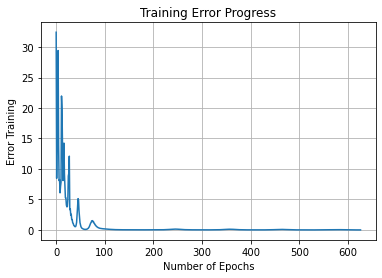

In [6]:
# Multi-Layer_Neural Network = Neurolab.NewFeedForward
# For the dimensions ---> [[min_vals, max_vals]]
# 10 neurons in 1st Hidden layer, 6 neurons in 2nd Hidden layer and 1 for Output layer
mlnn = nl.net.newff([[min_vals, max_vals]], [10, 6, 1])

# Then we are going to use gradient descent to train it
mlnn.trainf = nl.train.train_gd

error_progress = mlnn.train(data, labels, epochs=20000, show=100, goal=0.01)

plt.plot(error_progress)
plt.xlabel('Number of Epochs')
plt.ylabel('Error Training')
plt.title('Training Error Progress')
plt.grid()

Text(0.5, 1.0, 'Actual vs. Predicted')

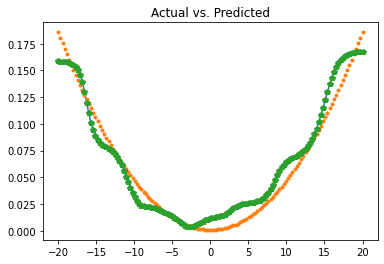

In [7]:
# output.shape(140 Rows, 1 Column)
output = mlnn.sim(data)

# y_pred.shape(140 Rows, Column)
y_pred = output.reshape(num_points)

# x_dense.shape(280 Rows, Column)
x_dense = np.linspace(min_vals, max_vals, num_points * 2)

# x_dense_fixed.shape(280 Rows, 1 Column)
x_dense_fixed = x_dense.reshape((x_dense.size, 1))

# y_dense_pred.shape(280 Rows, Column)
y_dense_pred = mlnn.sim(x_dense_fixed).reshape(x_dense.size)

# x_dense, y_dense_pred
# '-' : Solid Line
# x, y
# '.' : Point Marker
# x, y_pred
# 'p' : Pentagon Marker
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs. Predicted')

# Training the Multi-Layer Neural Network further thus reducing the error is going to lead to the convergence of
# the two curves shown 

